In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
def line_plot(data,title):
    dat = pd.read_csv(data)
    dat = dat[['Date','AverageTemperature']]
    dat['AverageTemperature']=np.round(np.where(dat['AverageTemperature'].isnull(),0,dat['AverageTemperature']),3)
    dat['Date'] = dat['Date'].apply(lambda x:' '.join(x.split(' ')[1:]))
    time = pd.date_range('2012-10-01', periods=60*24, freq='1min').time
    dat.index = time
    dat = dat.drop('Date',axis=1)
    plt.figure(figsize=(20,10))
    plt.plot(dat[dat['AverageTemperature']>0],linestyle='dashed',color='k',label='Average temperature')
    plt.plot(dat[dat['AverageTemperature']>160],'o',color='r',label='Average temperature >160F')
    plt.legend(loc='best')
    plt.title(title)
    plt.savefig('plots/'+ title + 'line.pdf')

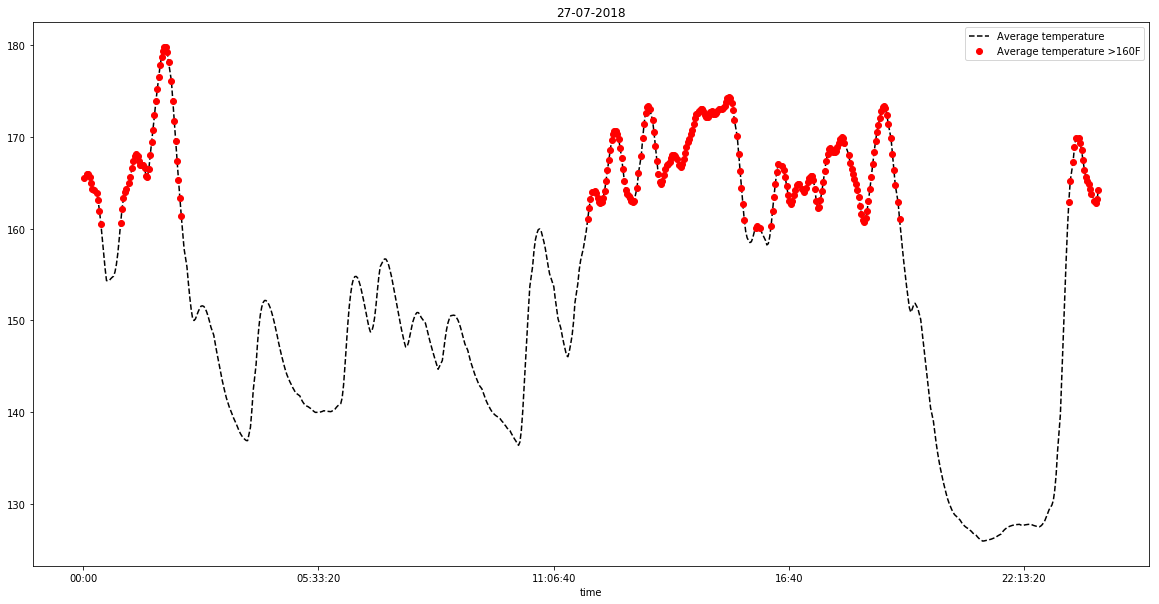

In [18]:
line_plot('result-27.csv','27-07-2018')

In [44]:
def bar_plot(data,title):
    dat = pd.read_csv(data)
    dat = dat[['Date','AverageTemperature']]
    dat['AverageTemperature']=np.round(np.where(dat['AverageTemperature'].isnull(),0,dat['AverageTemperature']),3)
    dat['Date'] = dat['Date'].apply(lambda x:' '.join(x.split(' ')[1:]))
    dat.index = dat['Date']
    dat = dat.drop('Date',axis=1)
    y_labels = list(dat.index)
    # Plot the figure.
    plt.figure(figsize=(20,100))
    ax = dat[dat['AverageTemperature']>=160].plot(kind='barh',figsize=(20,100),color='r',alpha=0.7)
    ax.set_title(title+': ' + str(len(dat[dat['AverageTemperature']>=160]))+' Points where Average Temperature>=160F')
    ax.set_xlabel('Average Temperature')
    ax.set_ylabel('Time')
    ax.set_yticklabels(y_labels)
    ax.set_xlim(0, max(dat['AverageTemperature'].values)+50) # expand xlim to make labels easier to read
    ax.legend(['Average Temperature >= 160F'])
    rects = ax.patches
    labels = list(range(1,len(dat[dat['AverageTemperature']>=160])+1))
    # For each bar: Place a label
    for rect,label in zip(rects,labels):
        # Get X and Y placement of label from rect.
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        ha = 'left'

        # If value of bar is negative: Place label left of bar
        if x_value < 0:
            # Invert space to place label to the left
            space *= -1
            # Horizontally align label at right
            ha = 'right'


        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(space, 0),          # Horizontally shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            va='center',                # Vertically center label
            ha=ha)                     # Horizontally align label differently for
                                        # positive and negative values.
    plt.savefig('plots/'+ title + 'bar.pdf')

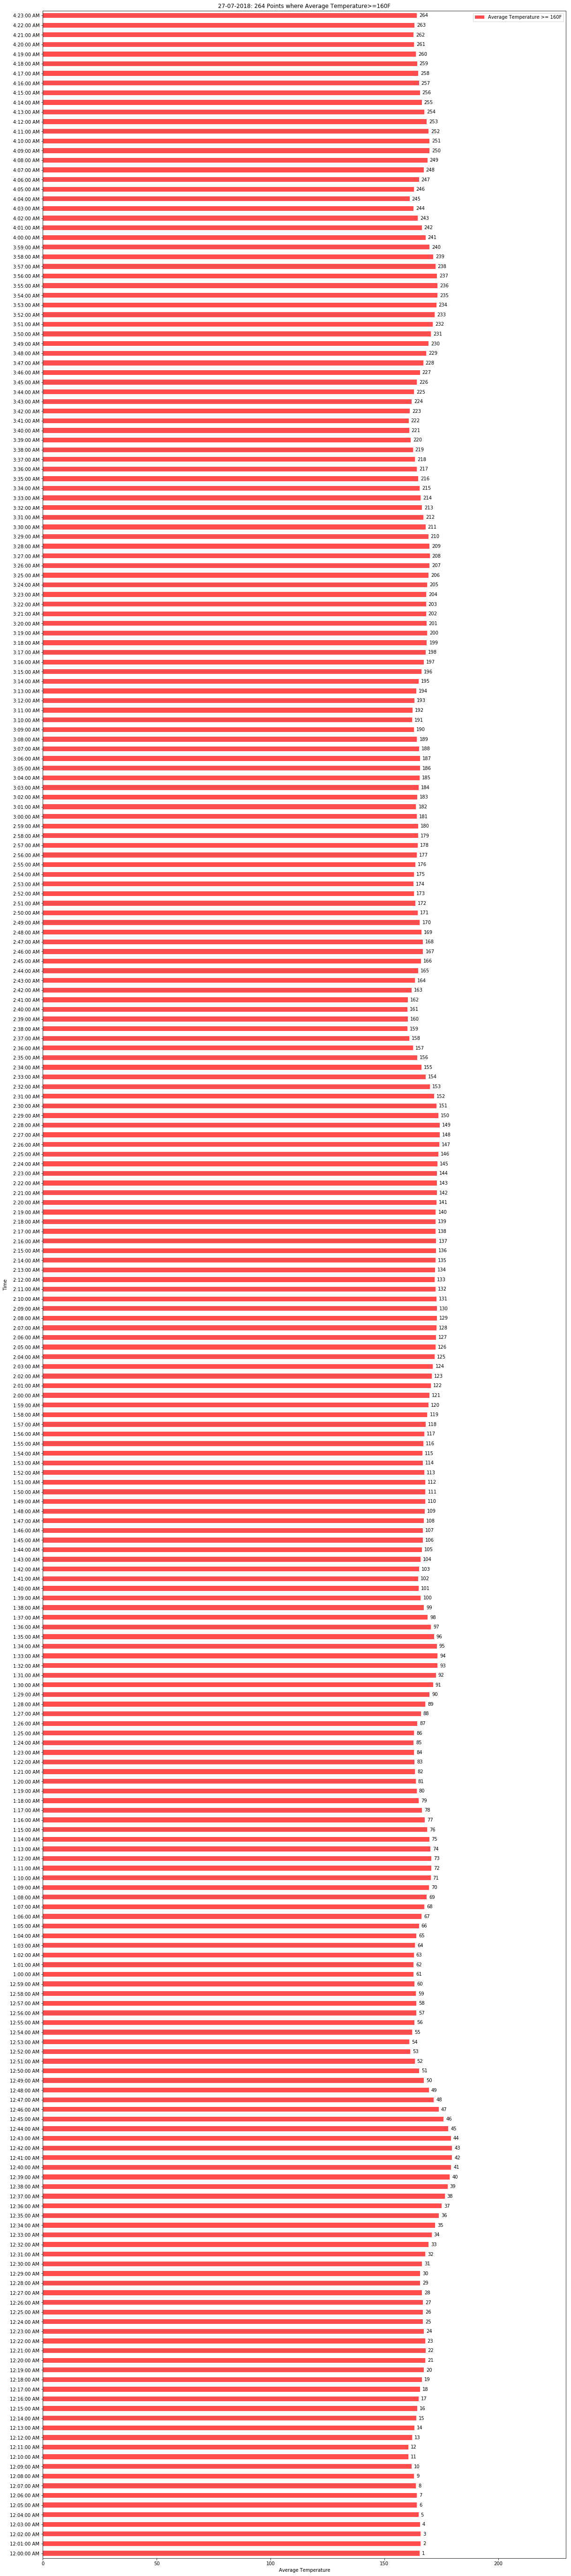

In [46]:
bar_plot('result-27.csv','27-07-2018')